# Project Title: Resturant review analysis

# Problem Statement

Normally, a lot of businesses are remained as failures due to lack of profit, lack of proper improvement measures. Mostly, restaurant owners face a lot of difficulties to improve their productivity. This project really helps those who want to increase their productivity, which in turn increases their business profits. This is the main objective of this project.

What the project does is that the restaurant owner gets to know about drawbacks of his restaurant such as most disliked food items of his restaurant by customer’s text review which is processed with ML classification algorithm(Naive Bayes)

The purpose of this analysis is to build a prediction model to predict whether a review on the restaurant is positive or negative. To do so, we will work on Restaurant Review dataset, we will load it into predicitve algorithms Multinomial Naive Bayes, Bernoulli Naive Bayes and Logistic Regression. In the end, we hope to find a "best" model for predicting the review's sentiment

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Read the dataset**

In [2]:
df=pd.read_csv('r_data.tsv',delimiter='\t')

In [3]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
1381,clean,1
1382,less,0
1383,clean,1
1384,less,0


In [4]:
df.shape

(1386, 2)

In [5]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [6]:
df.duplicated().sum()

373

In [7]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [8]:
df.shape

(1013, 2)

<AxesSubplot: >

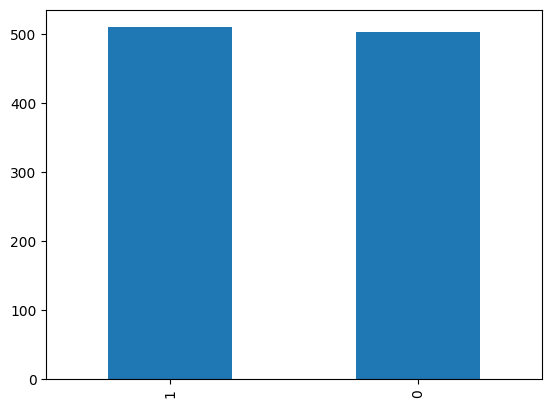

In [9]:
df['Liked'].value_counts().plot(kind='bar')

Dataset is Balanced

**1.Text Preprocessing**

Preprocessing Dataset Each review undergoes through a preprocessing step, where all the vague information is removed.
Removing the Stopwords, numeric and speacial charecters. Normalizing each review using the approach of stemming.

In [10]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [11]:
stem=PorterStemmer()

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
corpus=[]
for i in range(len(df['Review'])):
    #Remove special character and digit
    mystr=re.sub(r'[^a-zA-Z\s]','',df['Review'][i])
    #convert into lower case
    mystr=mystr.lower()
    #Tokenization
    list1=mystr.split()
    #Remove stopwords and stemming
    list2=[stem.stem(word)for word in list1 if word not in set(stopwords.words('english'))]
    #convert into original string
    final=' '.join(list2)
    corpus.append(final)

In [14]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti didnt tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberrymmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'that rightth red velvet cakeohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'foun

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

**2.Vectorization**

From the cleaned dataset, potential features are extracted and are converted to numerical format. The vectorization techniques are used to convert textual data to numerical format. Using vectorization, a matrix is created where each column represents a feature and each row represents an individual review.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [17]:
X=cv.fit_transform(corpus).toarray()
y=df['Liked']

In [18]:
df1=pd.DataFrame(X,columns=cv.get_feature_names_out())
df1

,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,acknowledg,across,...,yelper,yet,youd,youll,your,yucki,yukon,yum,yummi,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
import pickle #joblib
f=open('pickle','wb')
pickle.dump(cv,f)
f.close()

**3.Training and classification**

Training and Classification Further the data is splitted into training and testing set using Cross Validation technique. This data is used as input to classification algorithm.
Classification Algorithms:
Algorithms like Decision tree, Support Vector Machine, Logistic Regression, Naive Bayes were implemented and on comparing the evaluation metrics two of the algorithms gave better predictions than others.
Multinomial Naive Bayes Bernoulli Naive Bayes Logistic Regression

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
X_train.shape

(810, 1612)

In [22]:
X_test.shape

(203, 1612)

**1.MultinomialNB**

In [23]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier1= MultinomialNB(alpha=0.1)
classifier1.fit(X_train,y_train)


MultinomialNB(alpha=0.1)

In [24]:
# Predicting the Test set results
y_pred = classifier1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[79 16]
 [25 83]]


In [25]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
print('Classification Report\n', classification_report(y_test, y_pred))
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.83      0.79        95
           1       0.84      0.77      0.80       108

    accuracy                           0.80       203
   macro avg       0.80      0.80      0.80       203
weighted avg       0.80      0.80      0.80       203



Accuracy is  79.8 %
Precision is  0.84
Recall is  0.77


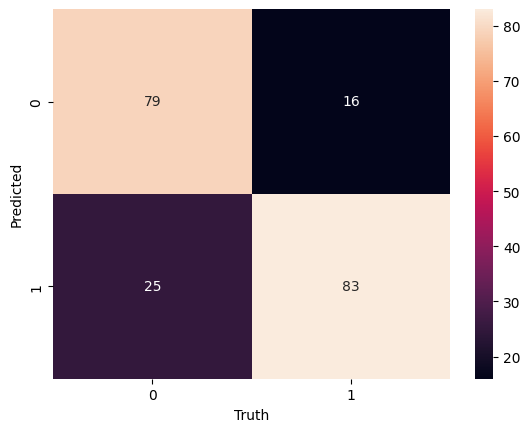

In [26]:

sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()

**2.BernoulliNB**

In [27]:
from sklearn.naive_bayes import BernoulliNB
classifier2 = BernoulliNB(alpha=1.0)
classifier2.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier2.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
print('Classification Report\n', classification_report(y_test, y_pred))
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[73 22]
 [23 85]]
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.77      0.76        95
           1       0.79      0.79      0.79       108

    accuracy                           0.78       203
   macro avg       0.78      0.78      0.78       203
weighted avg       0.78      0.78      0.78       203



Accuracy is  77.83 %
Precision is  0.79
Recall is  0.79


**3.LogisticRegression**

In [28]:
from sklearn.linear_model import LogisticRegression
classifier3 =LogisticRegression()
classifier3.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier3.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
print('Classification Report\n', classification_report(y_test, y_pred))
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[78 17]
 [29 79]]
Classification Report
               precision    recall  f1-score   support

           0       0.73      0.82      0.77        95
           1       0.82      0.73      0.77       108

    accuracy                           0.77       203
   macro avg       0.78      0.78      0.77       203
weighted avg       0.78      0.77      0.77       203



Accuracy is  77.34 %
Precision is  0.82
Recall is  0.73


**classifier1(MultinomialNB) is good for text analysis with highly precision**

In [29]:
import pickle
f=open('classifier1','wb')
pickle.dump(classifier1,f)
f.close()

In [30]:
a='not bad'

In [31]:
a_cv=cv.transform([a])

In [32]:
res=classifier1.predict(a_cv)
res

array([0], dtype=int64)

In [33]:
if 'not' in a:
    res[0]=abs(res[0]-1)
    
print(res[0])

1


**4.Result and Analysis**

n this study, an attempt has been made to classify sentiment analysis for restaurant reviews using machine learning techniques. Two algorithms namely Multinomial Naive Bayes and Bernoulli Naive Bayes are implemented.

Evaluation metrics used here are accuracy, precision and recall.

Using Multinomial Naive Bayes, Accuracy of prediction is 79.8%. Precision of prediction is 0.84. Recall of prediction is 0.77.

Using Bernoulli Naive Bayes, Accuracy of prediction is 77.83%. Precision of prediction is 0.79. Recall of prediction is 0.79.

Using Logistic Regression, Accuracy of prediction is 77.34%. Precision of prediction is 0.82. Recall of prediction is 0.73.

From the above results, Multinomial Naive Bayes is slightly better method compared to Bernoulli Naive Bayes and Logistic Regression, with 77.33% accuracy which means the model built for the prediction of sentiment of the restaurant review gives 77.33% right prediction.
